In [28]:
!pip install scipy

  Using cached scipy-1.16.2-cp311-cp311-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.16.2-cp311-cp311-win_amd64.whl (38.7 MB)


In [29]:
import os
import kagglehub
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import tensorflow as tf
import tensorflow_io as tfio
from scipy.signal import resample


In [6]:
path = kagglehub.dataset_download("kenjee/z-by-hp-unlocked-challenge-3-signal-processing")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\108pa\.cache\kagglehub\datasets\kenjee\z-by-hp-unlocked-challenge-3-signal-processing\versions\1


In [7]:
CAPUCHIN_FILE = os.path.join(path, 'Parsed_Capuchinbird_Clips', 'XC3776-3.wav')
NOT_CAPUCHIN_FILE = os.path.join(path, 'Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')

In [30]:
# Convert .wav to tensor
def load_wav_16k_mono(filename):
    file_contents = tf.io.read_file(filename)
    audio = tf.audio.decode_wav(file_contents, desired_channels=1)
    wav = tf.squeeze(audio.audio, axis=-1)
    sample_rate = tf.cast(audio.sample_rate, dtype=tf.int64)

    # Convert tensor to numpy for scipy
    wav_np = wav.numpy()
    target_rate = 16000
    num_samples = int(len(wav_np) * target_rate / sample_rate.numpy())
    wav_resampled = resample(wav_np, num_samples)
    return tf.convert_to_tensor(wav_resampled, dtype=tf.float32)

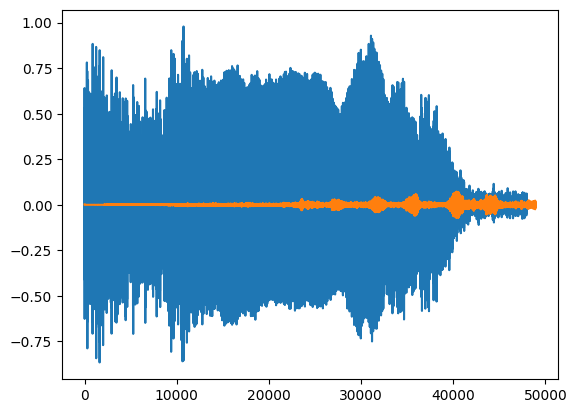

In [31]:
# Plot the wave
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

plt.plot(wave)
plt.plot(nwave)
plt.show()

In [ ]:
POS = os.path.join(path, 'Parsed_Capuchinbird_Clips')
NEG = os.path.join(path, 'Parsed_Not_Capuchinbird_Clips')

pos = tf.data.Dataset.list_files(POS + '\*.wav', shuffle=True)
neg = tf.data.Dataset.list_files(NEG + '\*.wav', shuffle=True)